In [1]:
#!pip install pyarrow
#!pip install pandas
#!pip install fastparquet

In [2]:
import pandas as pd

In [3]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-01.parquet',engine='fastparquet')
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-01-01 00:03:01,2025-01-01 00:17:12,N,1.0,75,235,1.0,5.93,24.70,...,0.5,6.80,0.00,NaN,1.0,34.00,1.0,1.0,0.00,0.0
1,2,2025-01-01 00:19:59,2025-01-01 00:25:52,N,1.0,166,75,1.0,1.32,8.60,...,0.5,0.00,0.00,NaN,1.0,11.10,2.0,1.0,0.00,0.0
2,2,2025-01-01 00:05:29,2025-01-01 00:07:21,N,5.0,171,73,1.0,0.41,25.55,...,0.0,0.00,0.00,NaN,1.0,26.55,2.0,2.0,0.00,0.0
3,2,2025-01-01 00:52:24,2025-01-01 01:07:52,N,1.0,74,223,1.0,4.12,21.20,...,0.5,6.13,6.94,NaN,1.0,36.77,1.0,1.0,0.00,0.0
4,2,2025-01-01 00:25:05,2025-01-01 01:01:10,N,1.0,66,158,1.0,4.71,33.80,...,0.5,7.81,0.00,NaN,1.0,46.86,1.0,1.0,2.75,0.0


In [4]:
## create duration time for trip column

df['duration'] = pd.to_datetime(df.lpep_dropoff_datetime)-pd.to_datetime(df.lpep_pickup_datetime)
df = df.drop(columns=['lpep_dropoff_datetime','lpep_pickup_datetime'])
df['duration'] = df.duration.apply(lambda x: x.total_seconds()/60)
df.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee,duration
0,2,N,1.0,75,235,1.0,5.93,24.70,1.0,0.5,6.80,0.00,NaN,1.0,34.00,1.0,1.0,0.00,0.0,14.183333
1,2,N,1.0,166,75,1.0,1.32,8.60,1.0,0.5,0.00,0.00,NaN,1.0,11.10,2.0,1.0,0.00,0.0,5.883333
2,2,N,5.0,171,73,1.0,0.41,25.55,0.0,0.0,0.00,0.00,NaN,1.0,26.55,2.0,2.0,0.00,0.0,1.866667
3,2,N,1.0,74,223,1.0,4.12,21.20,1.0,0.5,6.13,6.94,NaN,1.0,36.77,1.0,1.0,0.00,0.0,15.466667
4,2,N,1.0,66,158,1.0,4.71,33.80,1.0,0.5,7.81,0.00,NaN,1.0,46.86,1.0,1.0,2.75,0.0,36.083333


In [5]:
#!pip install seaborn
#!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='duration', ylabel='Count'>

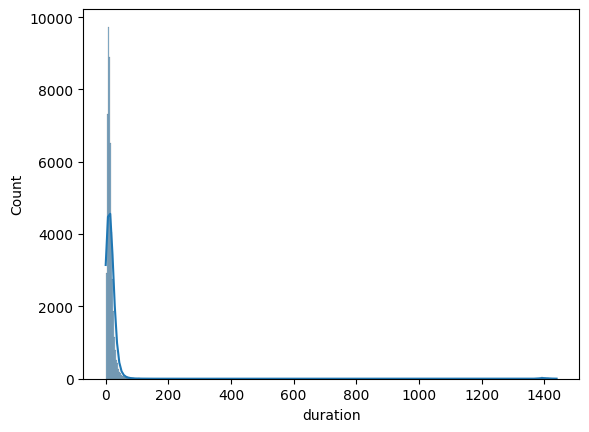

In [6]:
sns.histplot(df.duration, kde=True)

In [7]:
df.duration.describe(percentiles=[0.05,0.25,0.95,0.98,0.99])

count    48326.000000
mean        19.955195
std         93.924039
min          0.000000
5%           2.766667
25%          7.200000
50%         11.250000
95%         32.366667
98%         44.983333
99%         61.991667
max       1439.650000
Name: duration, dtype: float64

In [8]:
df = df[(df.duration >=1) & (df.duration <=60)]
df.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee,duration
0,2,N,1.0,75,235,1.0,5.93,24.70,1.0,0.5,6.80,0.00,NaN,1.0,34.00,1.0,1.0,0.00,0.0,14.183333
1,2,N,1.0,166,75,1.0,1.32,8.60,1.0,0.5,0.00,0.00,NaN,1.0,11.10,2.0,1.0,0.00,0.0,5.883333
2,2,N,5.0,171,73,1.0,0.41,25.55,0.0,0.0,0.00,0.00,NaN,1.0,26.55,2.0,2.0,0.00,0.0,1.866667
3,2,N,1.0,74,223,1.0,4.12,21.20,1.0,0.5,6.13,6.94,NaN,1.0,36.77,1.0,1.0,0.00,0.0,15.466667
4,2,N,1.0,66,158,1.0,4.71,33.80,1.0,0.5,7.81,0.00,NaN,1.0,46.86,1.0,1.0,2.75,0.0,36.083333


In [9]:
df.columns

Index(['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee',
       'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type',
       'congestion_surcharge', 'cbd_congestion_fee', 'duration'],
      dtype='object')

In [10]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [12]:
df[categorical] = df[categorical].astype(str)
df[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [ ]:
#!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 23.3 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 36.4 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [14]:
train_dict = df[categorical + numerical].to_dict(orient='records')

In [15]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)

In [16]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',
 'DOLocationID=146',
 'DOLocationID=147',
 'DOLocationID=148',

In [17]:
target = 'duration'
y_train = df[target].values

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [19]:
y_pred = model.predict(X_train)

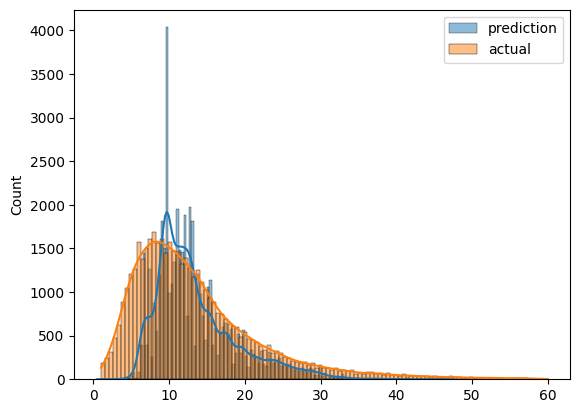

In [21]:
sns.histplot(y_pred, label='prediction', kde=True)
sns.histplot(y_train, label='actual', kde=True)

plt.legend()

In [23]:
from sklearn.metrics import root_mean_squared_error

res = root_mean_squared_error(y_train, y_pred)
print(res)


6.704280605546718


In [28]:
def read_dataframe(url):
    df = pd.read_parquet(url)

    df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
    df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    numerical = ['trip_distance']

    return df

In [29]:
df_train = read_dataframe("https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-01.parquet")
df_val = read_dataframe("https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-02.parquet")

In [36]:
#df_train['PU_DO'] = df_train['PULocationID'] + '_' +df_train['DOLocationID']
#df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [32]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
train_dicts = df_train[categorical+numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical+numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [34]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print(root_mean_squared_error(y_pred, y_val))

9.018920764427403


In [38]:
import pickle
import os 

output_path = 'models/model.bin'
os.makedirs(os.path.dirname(output_path), exist_ok=True)

with open(output_path, 'wb') as f:
    pickle.dump((dv, model), f)